# Análisis del proceso de transpilación

En este NoteBook analizamos las transformaciones que lleva a cabo el transpilador para adaptar un circuito a las puertas y las conexiones disponibles en un computador real. 
Empezamos elegiendo el computador e imprimiendo sus características.

['id', 'rz', 'sx', 'x', 'cx', 'reset', 'measure', 'delay']
[[4, 3], [3, 4], [0, 1], [1, 0], [3, 1], [1, 3], [2, 1], [1, 2]]


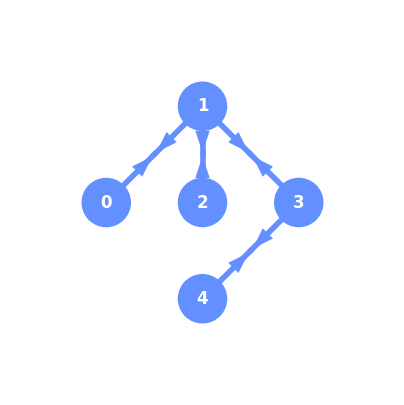

In [1]:
from qiskit import QuantumCircuit, transpile
from qiskit.providers.fake_provider import FakeLimaV2
from qiskit.visualization import plot_gate_map

#Elijo como backend el computador ibmq_lima
backend=FakeLimaV2()


#Imprimo sus puertas básicas y su mapa de acoplamiento
print(backend.operation_names)
print(backend.coupling_map)
plot_gate_map(backend,plot_directed=True)

Vamos a ver ahora la influencia de los diferentes niveles de optimización a la hora de transpilar un circuito. 

profundidad= 3


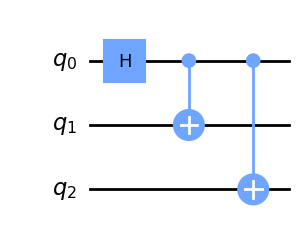

In [2]:
#Creo un circuito de 3 qubits, imprimo su profundidad y lo dibujo
qc=QuantumCircuit(3)
qc.h(0)
qc.cx(0,1)
qc.cx(0,2)
print('profundidad=',qc.depth())
qc.draw()

profundidad= 8


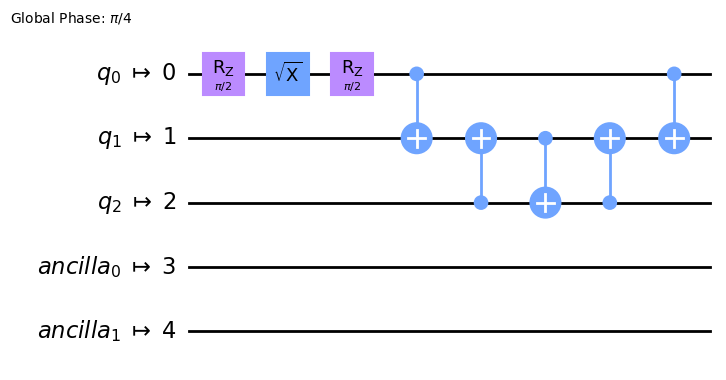

In [3]:
#Transpilo el circuito utilizando el nivel de optimizacion 0
tqc=transpile(qc,backend,optimization_level=0)
print('profundidad=',tqc.depth())
tqc.draw()

Vemos que mapea los qubits virtuales a los físicos por orden, transforma la puerta hadamard en un producto de 3 puertas básicas e introduce una puerta SWAP para tratar con la falta de conexión entre los qubits 0 y 2. 

profundidad= 5


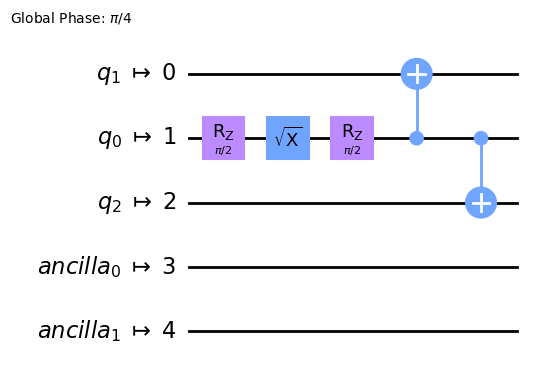

In [4]:
#Transpilo el circuito utilizando el nivel de optimizacion 1
tqc=transpile(qc,backend,optimization_level=1)
print('profundidad=',tqc.depth())
tqc.draw()

En este caso no mapea los qubits por orden y consigue, de esta forma, evitar la SWAP. Es el nivel de optimización por defecto.

profundidad= 8


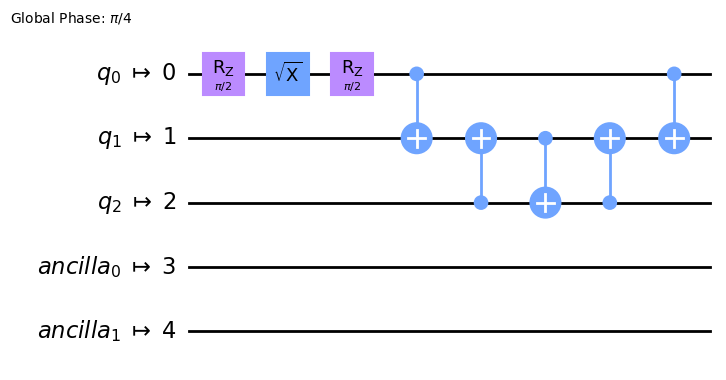

In [5]:
#Transpilo el circuito utilizando el nivel de optimizacion 1 
#y forzando un mapeo de los qubits virtuales a los fisicos
tqc=transpile(qc,backend,initial_layout=[0,1,2],optimization_level=1)
print('profundidad=',tqc.depth())
tqc.draw()

Si forzamos el mapeo por orden también consigue mejores resultados que con el nivel de optmización 0, ya que es capaz de reducir el número total de puertas. Los resultados pueden variar de una ejecución a otra al utilizar algoritmos estocásticos a la hora de hacer la transpilación. 

profundidad= 5


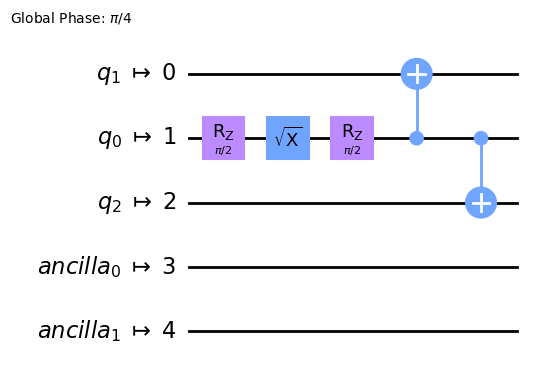

In [6]:
#Transpilo el circuito utilizando el nivel de optimizacion 2 
tqc=transpile(qc,backend,optimization_level=2)
print('profundidad=',tqc.depth())
tqc.draw()

Mismo resultado que con nivel de optimización 1. 

Vamos a ver ahora como serían las transformaciones de una SWAP y una CCNOT

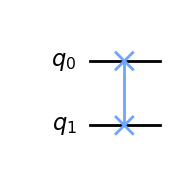

In [7]:
#Creamos un circuito con una swap y lo dibujamos
swap_gate=QuantumCircuit(2)
swap_gate.swap(0,1)
swap_gate.draw()

profundidad= 3


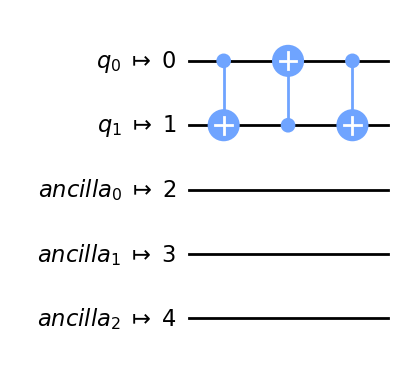

In [8]:
#Dibujamos ahora el circuito transpilado e imprimimos su profundidad
transpiled_swap_gate=transpile(swap_gate,backend)
print("profundidad=",transpiled_swap_gate.depth())
transpiled_swap_gate.draw()

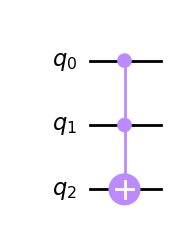

In [9]:
#Creamos un circuito con una CCNOT y lo dibujamos
ccnot_gate=QuantumCircuit(3)
ccnot_gate.ccx(0,1,2)
ccnot_gate.draw()

profundidad= 19


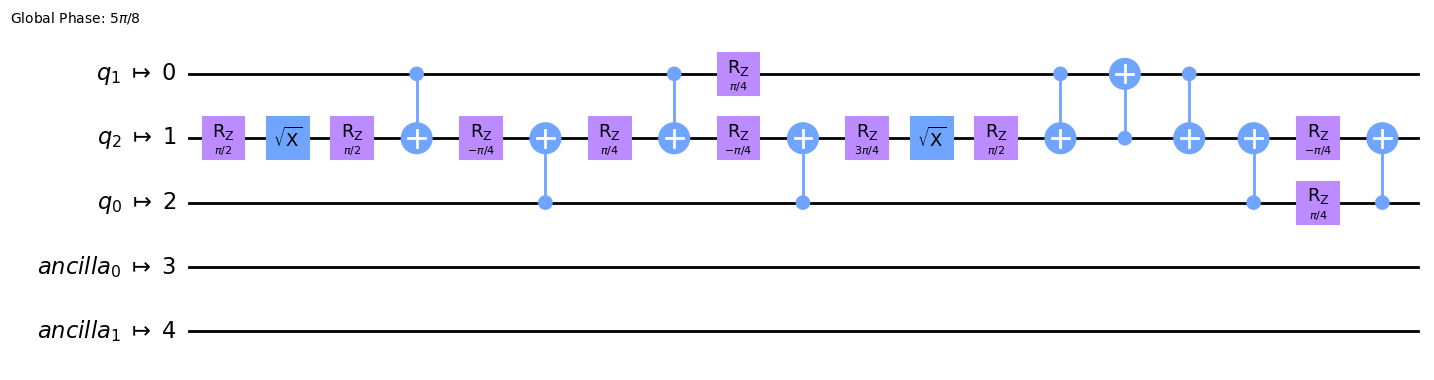

In [10]:
#Dibujamos ahora el circuito transpilado e imprimimos su profundidad
transpiled_ccnot_gate=transpile(ccnot_gate,backend)
print("profundidad=",transpiled_ccnot_gate.depth())
transpiled_ccnot_gate.draw()

Las puertas CCNOT son muy costosas, habría que tratar de evitarlas. 

In [11]:
import qiskit.tools.jupyter
%qiskit_version_table